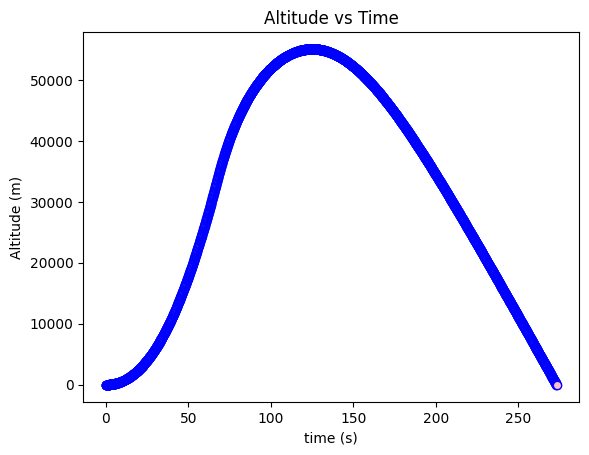

In [51]:
import matplotlib.pyplot as plt
import numpy as np

t = 0 # s, time
delta_t = 0.1 # s/iteration, change in time from one iteration to the next
# delta_t_post_burn = 1 # s/iteration, change in time from one iteration to the next

fuel = 8800 # kg, mass of fuel
delta_fuel = 129.4 # kg/s, rate at which mass is burned and expelled from the system
exhaust_velocity = 2050 # m/s, The velocity at which fuel is being expelled from the system
empty_mass = 4000 # kg, dry mass of the rocket
gravity = 9.8 #N/kg, gravity on Earth's surface
gravitational_constant = 6.6738e-11 # m^3/(kg*s^2) unversal gravitation constant
mass_E = 5.97e+24 #kg, mass of the Earth
surface_area = np.pi * (1.65/2)**2 #m^2
drag_coefficient = 0.125
air_density = 1.225 #kg/m^3


position = 6371000 # m, the position of the rocket (radius of the Earth)
velocity = 0 # m/s, the velocity of the rocket

tlist = [t] #s
alist = [0] # m/s, acceleration
vlist = [velocity] #m
positionlist = [position-6371000]

while fuel > 0:
    force_thrust = delta_fuel * exhaust_velocity
    force_gravity = (gravitational_constant * (fuel + empty_mass) * (mass_E)) / (position*position)
    F_air = 0.5*air_density*(velocity**2)*drag_coefficient*surface_area

    force_net = force_thrust - force_gravity - F_air
    
    acceleration = (force_net / (empty_mass + fuel))
    velocity += acceleration*delta_t
    position += velocity*delta_t

    t += delta_t
    fuel -= (delta_fuel * delta_t)

    tlist.append(t)
    vlist.append(velocity)
    alist.append(acceleration)
    positionlist.append(position-6371000)


while position > 6371000:
    force_gravity = (gravitational_constant * (fuel + empty_mass) * (mass_E)) / (position*position)
    
    F_air = 0.5*drag_coefficient*air_density*(velocity*velocity)*surface_area
    if(velocity > 0):
        F_air *= -1

    force_net = (-force_gravity) + (F_air) 

    acceleration = force_net / empty_mass
    velocity += acceleration*delta_t
    position += velocity*delta_t

    t += delta_t
    
    tlist.append(t)
    vlist.append(velocity)
    alist.append(acceleration)
    positionlist.append(position-6371000)



plt.xlabel("time (s)")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs Time")

plt.scatter(tlist, positionlist, color='pink', edgecolor='blue');   # this makes a scatterplot!

plt.show() 

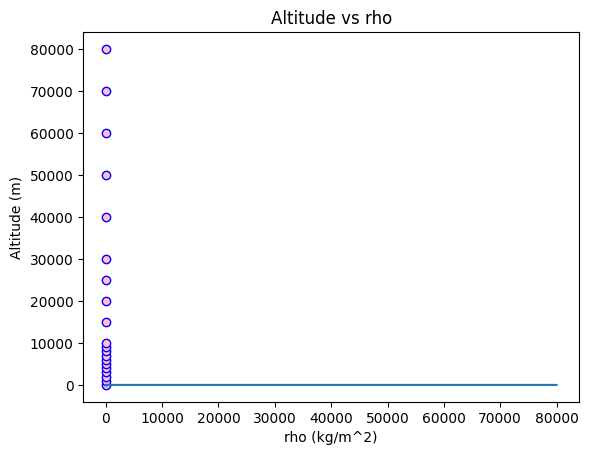

In [60]:
import matplotlib.pyplot as plt
import numpy as np
#lol idk why this ain't working as of now.
# Altitude (m)
# ρ (kg/m^3)

altitude = np.array([
    0000,
    1000,
    2000,
    3000,
    4000,
    5000,
    6000,
    7000,
    8000,
    9000,
    10000,
    15000,
    20000,
    25000,
    30000,
    40000,
    50000,
    60000,
    70000,
    80000
    ])

rho = [
    1.225,
    1.112,
    1.007,
    0.9093,
    0.8194,
    0.7364,
    0.6601,
    0.59,
    0.5258,
    0.4671,
    0.4135,
    0.1948,
    0.08891,
    0.04008,
    0.01841,
    0.003996,
    0.001027,
    0.0003097,
    0.00008283,
    0.00001846,
]


plt.xlabel("rho (kg/m^2)")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs rho")
plt.scatter(rho, altitude, color='pink', edgecolor='blue')

a, b, c = np.polyfit(altitude, rho, 2)
y_model = a*(altitude*altitude)+b*altitude + c

plt.plot(altitude, y_model)